# Basic classifier using a derivation of AlexNet

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

character
digit-recognizer



In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using data loading and prep from https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

In [4]:
train = pd.read_csv("../input/character/Train.csv")
test = pd.read_csv("../input/character/Test.csv")

0     6000
8     5999
14    5999
13    5999
12    5999
11    5999
10    5999
9     5999
7     5999
16    5999
6     5999
5     5999
4     5999
3     5999
2     5999
1     5999
15    5999
34    5999
33    5999
26    5999
32    5999
31    5999
30    5999
29    5999
28    5999
27    5999
25    5999
18    5999
24    5999
23    5999
22    5999
21    5999
20    5999
19    5999
17    5999
Name: label, dtype: int64

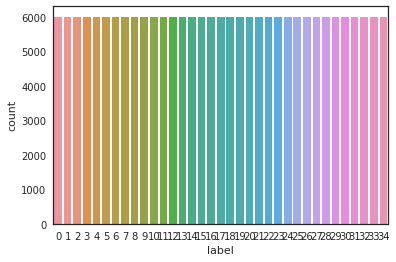

In [5]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [6]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [7]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 35)

In [9]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

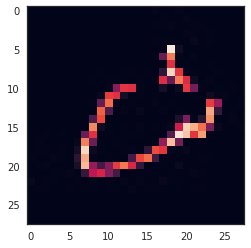

In [10]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

Defining the model architecture.

In [11]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (1,1),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (1,1),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(35, activation = "softmax"))

In [12]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [13]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [14]:
epochs = 200
batch_size = 86

In [15]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 188969 samples, validate on 20997 samples
Epoch 1/200
 - 31s - loss: 0.9488 - acc: 0.7083 - val_loss: 0.1875 - val_acc: 0.9425
Epoch 2/200
 - 21s - loss: 0.2576 - acc: 0.9243 - val_loss: 0.1781 - val_acc: 0.9478
Epoch 3/200
 - 21s - loss: 0.1989 - acc: 0.9433 - val_loss: 0.1131 - val_acc: 0.9686
Epoch 4/200
 - 22s - loss: 0.1856 - acc: 0.9489 - val_loss: 0.1650 - val_acc: 0.9549
Epoch 5/200
 - 21s - loss: 0.1807 - acc: 0.9506 - val_loss: 0.1114 - val_acc: 0.9692
Epoch 6/200
 - 21s - loss: 0.1879 - acc: 0.9497 - val_loss: 0.1166 - val_acc: 0.9709
Epoch 7/200
 - 22s - loss: 0.1889 - acc: 0.9501 - val_loss: 0.1180 - val_acc: 0.9713
Epoch 8/200
 - 23s - loss: 0.1979 - acc: 0.9486 - val_loss: 0.1012 - val_acc: 0.9726
Epoch 9/200
 - 22s - loss: 0.2087 - acc: 0.9470 - val_loss: 0.1150 - val_acc: 0.9686
Epoch 10/200
 - 23s - loss: 0.2179 - acc: 0.9443 - val_loss: 0.2257 - val_acc: 0.9448
Epoch 11/200
 - 22s - loss: 0.2245 - acc: 0.9443 - val_loss: 0.1070 - val_acc: 0.9707
Epoch 12/200

### Model Evaluation

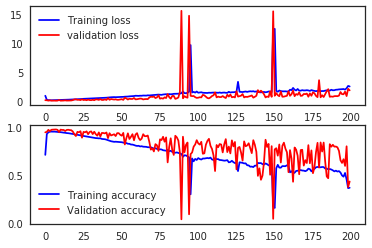

In [16]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [17]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_results.csv",index=False)